# 1. About Dataset

The data set belongs to a leading online E-Commerce company. An online retail (E-commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

- **CustomerID**: Unique customer ID
- **Churn**: Churn Flag
- **Tenure**: Tenure of customer in organization
- **PreferredLoginDevice**: Preferred login device of customer
- **CityTier**: City tier
- **WarehouseToHome**: Distance in between warehouse to home of customer
- **PreferredPaymentMode**: Preferred payment method of customer
- **Gender**: Gender of customer
- **HourSpendOnApp**: Number of hours spend on mobile application or website
- **NumberOfDeviceRegistered**: Total number of deceives is registered on particular customer
- **PreferedOrderCat**: Preferred order category of customer in last month
- **SatisfactionScore**: Satisfactory score of customer on service
- **MaritalStatus**: Marital status of customer
- **NumberOfAddress**: Total number of addresses added on particular customer
- **Complain**: Any complaint has been raised in last month
- **OrderAmountHikeFromlastYear**: Percentage increases in order from last year
- **CouponUsed**: Total number of coupon has been used in last month
- **OrderCount**: Total number of orders has been places in last month
- **DaySinceLastOrder**: Day Since last order by customer
- **CashbackAmount**: Average cashback in last month

# 2. Libraries

In [ ]:
!pip3 install openpyxl

Collecting openpyxl
 Downloading openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
█▍ | 10 kB 24.0 MB/s eta 0:00:01 |██▊ | 20 kB 9.5 MB/s eta 0:00:01 |████ | 30 kB 8.7 MB/s eta 0:00:01 |█████▍ | 40 kB 9.8 MB/s eta 0:00:01 |██████▊ | 51 kB 8.3 MB/s eta 0:00:01 |████████▏ | 61 kB 9.7 MB/s eta 0:00:01 |█████████▌ | 71 kB 10.0 MB/s eta 0:00:01 |██████████▉ | 81 kB 11.2 MB/s eta 0:00:01 |████████████▏ | 92 kB 12.4 MB/s eta 0:00:01 |█████████████▌ | 102 kB 12.1 MB/s eta 0:00:01 |██████████████▉ | 112 kB 12.1 MB/s eta 0:00:01 |████████████████▎ | 122 kB 12.1 MB/s eta 0:00:01 |█████████████████▋ | 133 kB 12.1 MB/s eta 0:00:01 |███████████████████ | 143 kB 12.1 MB/s eta 0:00:01 |████████████████████▎ | 153 kB 12.1 MB/s eta 0:00:01 |█████████████████████▋ | 163 kB 12.1 MB/s eta 0:00:01 |███████████████████████ | 174 kB 12.1 MB/s eta 0:00:01 |████████████████████████▍ | 184 kB 12.1 MB/s eta 0:00:01 |█████████████████████████▊ | 194 kB 12.1 MB/s eta 0:00:01 |███████████████████████████ | 204 kB 12.1 MB/s eta 0:00:01 |████████████████████████████▍ | 215 kB 12.1 MB/s eta 0:00:01 |█████████████████████████████▊ | 225 kB 12.1 MB/s eta 0:00:01 |███████████████████████████████▏| 235 kB 12.1 MB/s eta 0:00:01 |████████████████████████████████| 242 kB 12.1 MB/s 
Collecting et-xmlfile
 Downloading et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Installing collected packages: et-xmlfile, openpyxl
Successfully installed et-xmlfile-1.1.0 openpyxl-3.0.10
 WARNING: You are using pip version 21.0.1; however, version 22.1.2 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from pyspark.sql.types import _parse_datatype_string
%matplotlib inline

# 3. Reading the Data

In [ ]:
path = '/dbfs/mnt/landingzone/dev/E Commerce Dataset.xlsx'

df_raw = pd.read_excel(path, sheet_name='E Comm')
# Copy of data
df = df_raw.copy()
df.shape, df.columns

Out[3]: ((5630, 20),
 Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
 'MaritalStatus', 'NumberOfAddress', 'Complain',
 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
 'DaySinceLastOrder', 'CashbackAmount'],
 dtype='object'))

# 4. Exploratory Data Analysis

The dataset contains 5.630 rows and 20 columns. We analysed all the dataset and didn't find duplicated rows and incorrect data types.
Below, we list some steps considered during exploratory data analysis:
- Duplicated rows analysis
- Incorrect data types analysis
- Need to normalization of categorical variables
- Outliers analysis

In [ ]:
display(df)

CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
50002,1,null,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.9
50003,1,null,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
50005,1,0.0,Phone,1,12.0,CC,Male,null,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.6
50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
50007,1,null,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86000000000001
50008,1,null,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
50009,1,13.0,Phone,3,9.0,E wallet,Male,null,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83000000000001
50010,1,null,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


**Data Processing: Null values**

Some variables have null values, we analysed and decided using the median values to fill nulls

In [ ]:
# Null Values
null_cols = [col for col in df.columns if df[col].isnull().sum()]

null_p = df[null_cols].isnull().sum().reset_index()
null_p.columns = ['Columns','#']
null_p['%'] = round((null_p['#'] / df.shape[0]) * 100, 3)

display(null_p)
display(df[null_cols].describe().transpose().reset_index())

Columns,#,%
Tenure,264,4.689
WarehouseToHome,251,4.458
HourSpendOnApp,255,4.529
OrderAmountHikeFromlastYear,265,4.707
CouponUsed,256,4.547
OrderCount,258,4.583
DaySinceLastOrder,307,5.453


index,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899366380917,8.557240984165002,0.0,2.0,9.0,16.0,61.0
WarehouseToHome,5379.0,15.639895891429633,8.53147518676263,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5375.0,2.9315348837209303,0.7219258499760615,0.0,2.0,3.0,3.0,5.0
OrderAmountHikeFromlastYear,5365.0,15.707921714818266,3.6754854627464644,11.0,13.0,15.0,18.0,26.0
CouponUsed,5374.0,1.7510234462225531,1.8946214472186502,0.0,1.0,1.0,2.0,16.0
OrderCount,5372.0,3.0080044676098288,2.9396795481512608,1.0,1.0,2.0,3.0,16.0
DaySinceLastOrder,5323.0,4.543490512868683,3.6544331967013357,0.0,2.0,3.0,7.0,46.0


In [ ]:
# Fill null columns with median values
[df[col].fillna(df[col].median(), inplace=True) for col in df.columns if df[col].isnull().sum()]

Out[6]: [None, None, None, None, None, None, None]

**Data Processing: Outliers**

In a preliminary analysis we decide to use the IQR method to detect outliers because it is very simple to understand and use. After calc IQR distance and detect outliers, we'll flag it on dataset and use this data on test dataset.

Method: 1,5 * IQR

In [ ]:
def calc_outlier_range(col):
    times_IQR = 1.5                          # Define how many times IQR will used to calc Lower and Upper Range
    sorted(col)                              # Sorted series object
    Q1,Q3 = np.percentile(col,[25,75])       # Calc Q1 and Q3
    IQR = Q3-Q1                              # Calc the distance between Q3 and Q1
    lr= Q1-(times_IQR * IQR)                 # Calc Lower Range
    ur= Q3+(times_IQR * IQR)                 # Calc Upper Range
    
    return lr, ur

Out[8]:

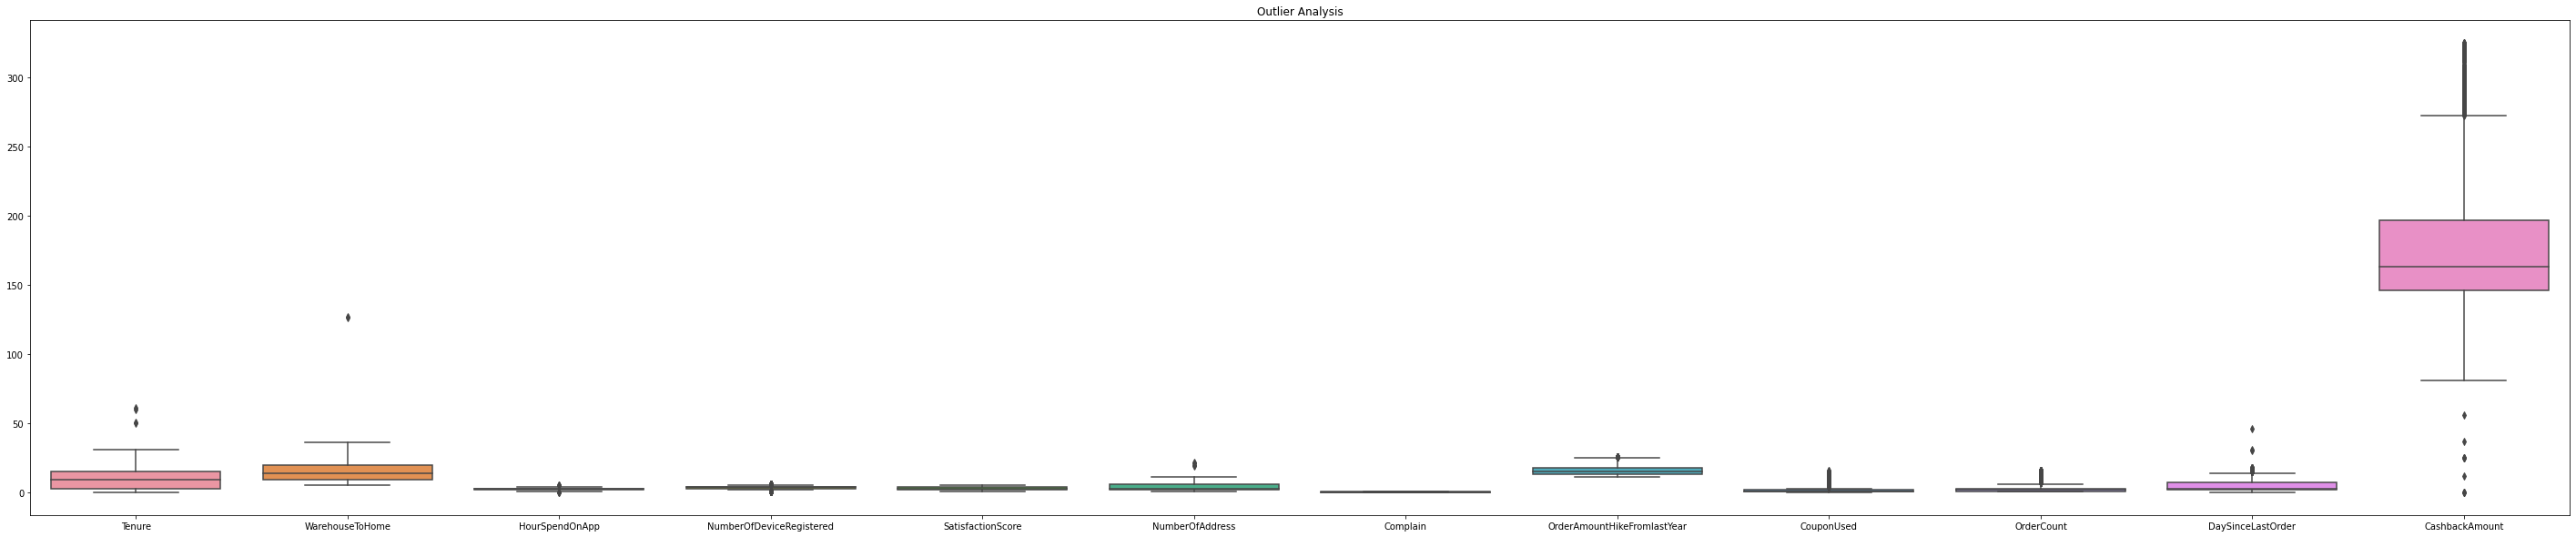

Text(0.5, 1.0, 'Outlier Analysis')

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df.drop(columns=['CustomerID','Churn','CityTier'])).set_title('Outlier Analysis')

In [ ]:
# Drop CustomerID, Churn and CityTier columns and select all that dtype is not object
columns_to_detect_outliers = [col for col in df.drop(columns=['CustomerID','Churn','CityTier'], axis=1).columns if df[col].dtype != 'object']

for column in columns_to_detect_outliers:
    # Get range IQR
    lr, ur = calc_outlier_range(df[column])
    
    # Fill outlier values with Upper Range or Lower Range
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

Out[10]:

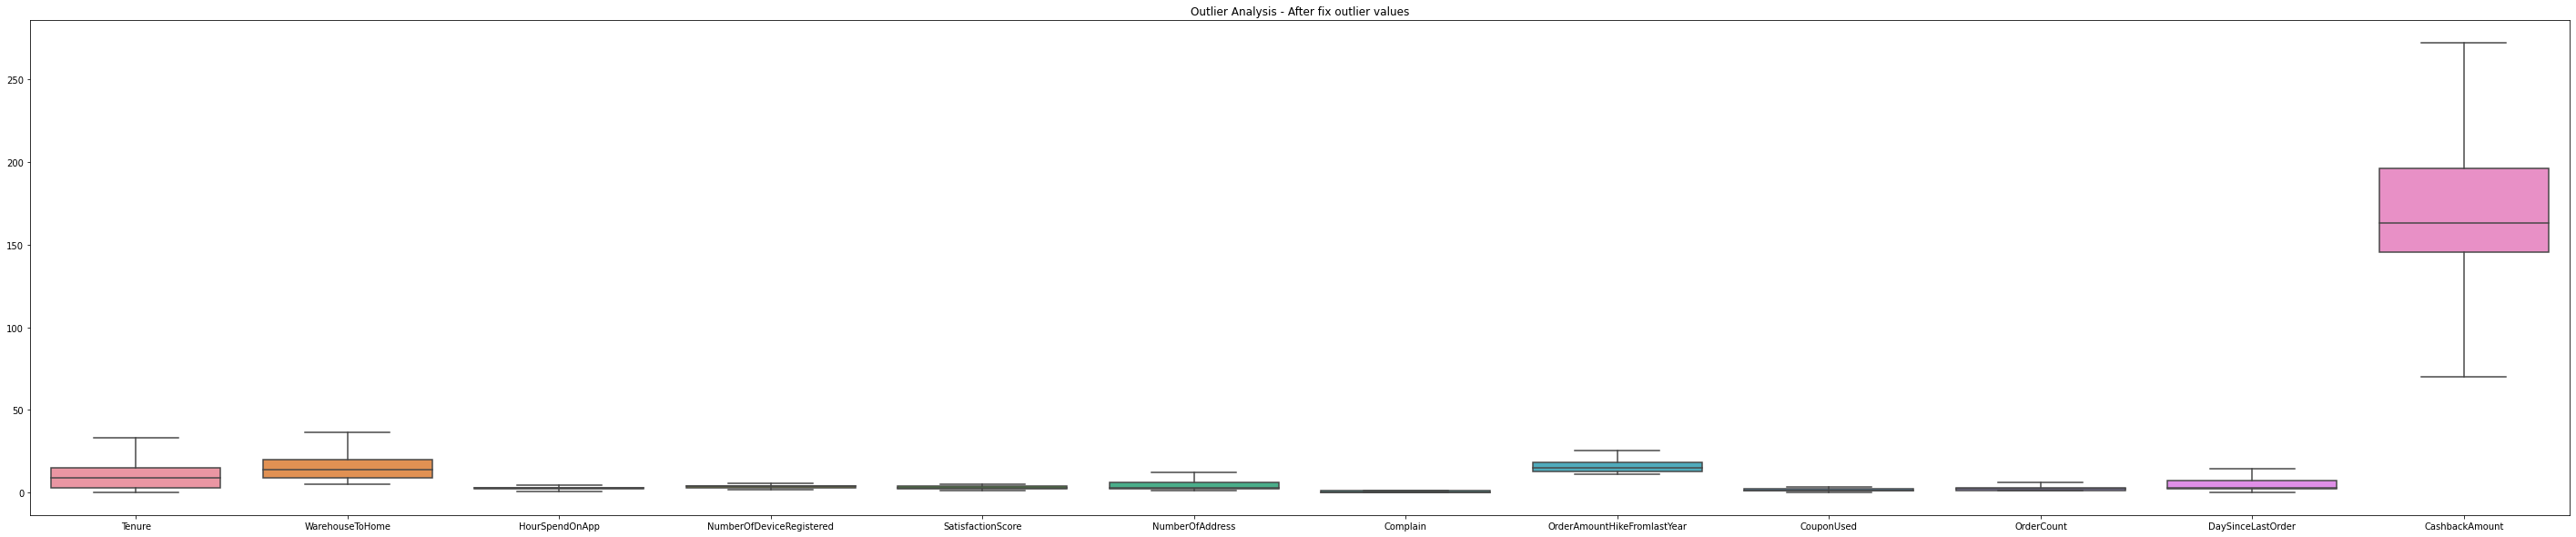

Text(0.5, 1.0, 'Outlier Analysis - After fix outlier values')

In [ ]:
data = df.drop(columns=['CustomerID','Churn','CityTier'])
plt.figure(figsize=(50,10))
sns.boxplot(data=data).set_title('Outlier Analysis - After fix outlier values')

**Data Processing: Casting types**

Casting to object: CityTier and Churn

In [ ]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

**Data Processing: OneHotEncoding**

In [ ]:
# Select cols to apply OneHotEncoder
cols_to_encoder = [col for col in df.drop(columns=['Churn']).columns if df[col].dtype == 'object']

# Create and fit encoder
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(df[cols_to_encoder])

# Transform features
features = one_hot_encoder.transform(df[cols_to_encoder]).toarray()
features_col_name = one_hot_encoder.get_feature_names(cols_to_encoder)

# Dataframe with encode features
df_features_encoder = pd.DataFrame(data=features, columns=features_col_name)
df_features_encoder['CustomerID'] = df['CustomerID']

# Final dataframe
df_features = df.copy()
df_features.drop(columns=cols_to_encoder, inplace=True, axis=1)
df_features = df_features.merge(df_features_encoder, on=['CustomerID'], how='inner')

df_features.shape

Out[12]: (5630, 38)

In [ ]:
df_features.columns

Out[13]: Index(['CustomerID', 'Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
 'CityTier_1', 'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_CC',
 'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
 'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
 'MaritalStatus_Married', 'MaritalStatus_Single'],
 dtype='object')

In [ ]:
display(df_features)

CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
50001,1,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
50002,1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50003,1,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50004,1,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
50005,1,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.6,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50006,1,0.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,7.0,139.19,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50007,1,9.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,0.0,120.86000000000001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
50008,1,9.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,0.0,122.93,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
50009,1,13.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,2.0,126.83000000000001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
50010,1,9.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,1.0,122.93,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Rename column names to remove special chars
cols = [col.replace(' ','_').replace('&','and') for col in df_features.columns]
df_features.columns = cols

**Testing schema before write on the feature tables**

In [ ]:
feature_schema = """
    CustomerID long,
    Churn long,
    Tenure double,
    WarehouseToHome double,
    HourSpendOnApp double,
    NumberOfDeviceRegistered double,
    SatisfactionScore double,
    NumberOfAddress double,
    Complain double,
    OrderAmountHikeFromlastYear double,
    CouponUsed double,
    OrderCount double,
    DaySinceLastOrder double,
    CashbackAmount double,
    PreferredLoginDevice_Computer double,
    PreferredLoginDevice_Mobile_Phone double,
    PreferredLoginDevice_Phone double,
    CityTier_1 double,
    CityTier_2 double,
    CityTier_3 double,
    PreferredPaymentMode_CC double,
    PreferredPaymentMode_COD double,
    PreferredPaymentMode_Cash_on_Delivery double,
    PreferredPaymentMode_Credit_Card double,
    PreferredPaymentMode_Debit_Card double,
    PreferredPaymentMode_E_wallet double,
    PreferredPaymentMode_UPI double,
    Gender_Female double,
    Gender_Male double,
    PreferedOrderCat_Fashion double,
    PreferedOrderCat_Grocery double,
    PreferedOrderCat_Laptop_and_Accessory double,
    PreferedOrderCat_Mobile double,
    PreferedOrderCat_Mobile_Phone double,
    PreferedOrderCat_Others double,
    MaritalStatus_Divorced double,
    MaritalStatus_Married double,
    MaritalStatus_Single double
"""

assert spark.createDataFrame(df_features).schema == _parse_datatype_string(feature_schema)

# 5. Feature Store

In order to do this, we'll want to provide the following:
1. The **name** of the database and table where we want to store the feature store
2. The **keys** for the table
3. The **schema** of the table
4. A **description** of the contents of the feature store

Create the feature table

In [ ]:
%sql 
CREATE DATABASE IF NOT EXISTS fs_ecommerce;

In [ ]:
from databricks.feature_store import FeatureStoreClient

fs = FeatureStoreClient()

database_name = 'fs_ecommerce'
df_spark_features = spark.createDataFrame(df_features)

feature_table = fs.create_table(
    name=f"{database_name}.churn",
    primary_keys=["CustomerID"],
    df=df_spark_features,
    description="This table contains one-hot and numeric features to predict the churn of a customer"
)

2022/07/05 21:10:25 WARNING databricks.feature_store.client: The feature table "fs_ecommerce.churn" already exists. Use "FeatureStoreClient.write_table" API to write to the feature table.

Write the records to the feature table

In [ ]:
fs.write_table(df=df_spark_features, name=f"{database_name}.churn", mode='merge') #mode='overwrite'